<a href="https://colab.research.google.com/github/Pam-Pam29/Group18-Formative-2-Text-Classification/blob/main/Group18_Formative_2_Text_Classification_Preprocessing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Our text sequence classification model

In [1]:
#Importing necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


In [2]:
url = 'https://raw.githubusercontent.com/Pam-Pam29/Group18-Formative-2-Text-Classification/refs/heads/main/dataset/data.csv'
df = pd.read_csv(url)
df.head(10)

,Sentence,Sentiment
0,The GeoSolutions technology will leverage Bene...,positive
1,"$ESI on lows, down $1.50 to $2.50 BK a real po...",negative
2,"For the last quarter of 2010 , Componenta 's n...",positive
3,According to the Finnish-Russian Chamber of Co...,neutral
4,The Swedish buyout firm has sold its remaining...,neutral
5,$SPY wouldn't be surprised to see a green close,positive
6,Shell's $70 Billion BG Deal Meets Shareholder ...,negative
7,SSH COMMUNICATIONS SECURITY CORP STOCK EXCHANG...,negative
8,Kone 's net sales rose by some 14 % year-on-ye...,positive
9,The Stockmann department store will have a tot...,neutral


DataFrame Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5842 entries, 0 to 5841
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Sentence   5842 non-null   object
 1   Sentiment  5842 non-null   object
dtypes: object(2)
memory usage: 91.4+ KB

Missing Values:
Sentence     0
Sentiment    0
dtype: int64

Unique Sentiments:
['positive' 'negative' 'neutral']

Sentiment Distribution:
Sentiment
neutral     3130
positive    1852
negative     860
Name: count, dtype: int64


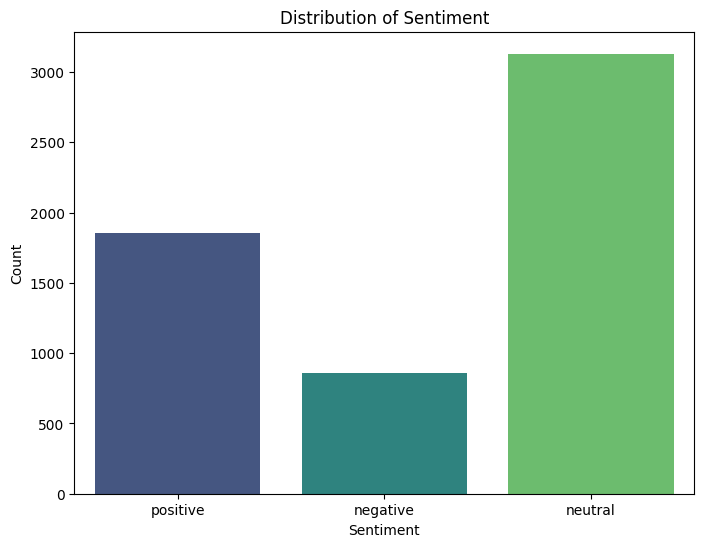


Descriptive statistics for sentence_length and word_count:
       sentence_length   word_count
count      5842.000000  5842.000000
mean        117.022253    21.004793
std          56.420425    10.306465
min           9.000000     2.000000
25%          72.000000    13.000000
50%         107.000000    19.000000
75%         150.000000    27.000000
max         315.000000    81.000000


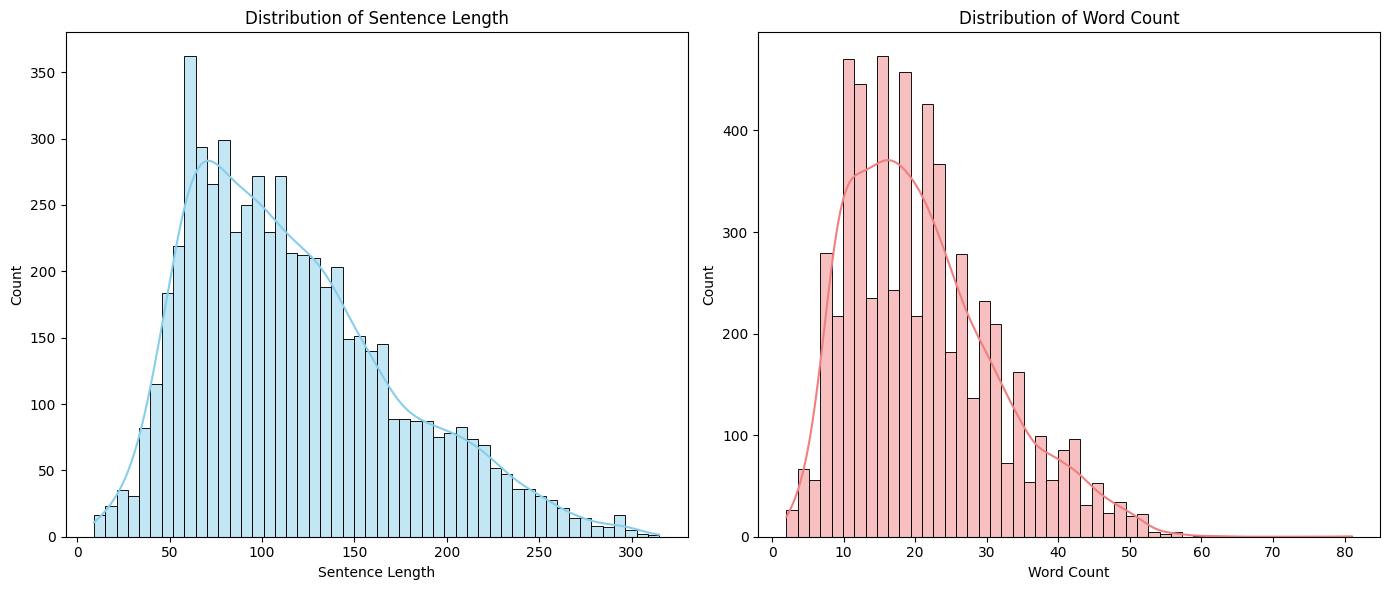

In [3]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

url = 'https://raw.githubusercontent.com/Pam-Pam29/Group18-Formative-2-Text-Classification/refs/heads/main/dataset/data.csv'
df = pd.read_csv(url)

print("DataFrame Info:")
df.info()

print("\nMissing Values:")
print(df.isnull().sum())

print("\nUnique Sentiments:")
print(df['Sentiment'].unique())

print("\nSentiment Distribution:")
print(df['Sentiment'].value_counts())

plt.figure(figsize=(8, 6))
sns.countplot(data=df, x='Sentiment', hue='Sentiment', palette='viridis', legend=False)
plt.title('Distribution of Sentiment')
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.show()

# Add new columns for text characteristics
df['sentence_length'] = df['Sentence'].apply(len)
df['word_count'] = df['Sentence'].apply(lambda x: len(str(x).split()))

print("\nDescriptive statistics for sentence_length and word_count:")
print(df[['sentence_length', 'word_count']].describe())

# Create and display histograms for 'sentence_length' and 'word_count'
plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
sns.histplot(df['sentence_length'], bins=50, kde=True, color='skyblue')
plt.title('Distribution of Sentence Length')
plt.xlabel('Sentence Length')
plt.ylabel('Count')

plt.subplot(1, 2, 2)
sns.histplot(df['word_count'], bins=50, kde=True, color='lightcoral')
plt.title('Distribution of Word Count')
plt.xlabel('Word Count')
plt.ylabel('Count')

plt.tight_layout()
plt.show()

In [4]:
def plot_vocabulary_analysis(df, save_path='vocabulary_analysis.png'):
    """
    Analyzes vocabulary size and unique words per sentiment class
    """
    fig, axes = plt.subplots(1, 2, figsize=(16, 6))

    # Calculate vocabulary metrics
    vocab_stats = {}
    for sentiment in df['Sentiment'].unique():
        texts = df[df['Sentiment'] == sentiment]['Sentence']
        all_words = ' '.join(texts).lower().split()
        vocab_stats[sentiment] = {
            'total_words': len(all_words),
            'unique_words': len(set(all_words)),
            'vocabulary_richness': len(set(all_words)) / len(all_words)
        }

    # Plot 1: Total vs Unique Words
    sentiments = list(vocab_stats.keys())
    total_words = [vocab_stats[s]['total_words'] for s in sentiments]
    unique_words = [vocab_stats[s]['unique_words'] for s in sentiments]

    x = np.arange(len(sentiments))
    width = 0.35

    bars1 = axes[0].bar(x - width/2, total_words, width, label='Total Words',
                        color='#3498db', alpha=0.8, edgecolor='black')
    bars2 = axes[0].bar(x + width/2, unique_words, width, label='Unique Words',
                        color='#e67e22', alpha=0.8, edgecolor='black')

    axes[0].set_xlabel('Sentiment Class', fontsize=12, fontweight='bold')
    axes[0].set_ylabel('Word Count', fontsize=12, fontweight='bold')
    axes[0].set_title('Total vs Unique Words by Sentiment',
                      fontsize=14, fontweight='bold')
    axes[0].set_xticks(x)
    axes[0].set_xticklabels(sentiments)
    axes[0].legend()
    axes[0].grid(axis='y', alpha=0.3)

    # Plot 2: Vocabulary Richness (Type-Token Ratio)
    richness = [vocab_stats[s]['vocabulary_richness'] for s in sentiments]
    colors = ['#e74c3c', '#95a5a6', '#2ecc71']

    bars = axes[1].bar(sentiments, richness, color=colors, alpha=0.8, edgecolor='black')
    axes[1].set_xlabel('Sentiment Class', fontsize=12, fontweight='bold')
    axes[1].set_ylabel('Vocabulary Richness (Type-Token Ratio)',
                       fontsize=12, fontweight='bold')
    axes[1].set_title('Vocabulary Richness by Sentiment',
                      fontsize=14, fontweight='bold')
    axes[1].grid(axis='y', alpha=0.3)

    # Add value labels
    for bar in bars:
        height = bar.get_height()
        axes[1].text(bar.get_x() + bar.get_width()/2., height,
                     f'{height:.4f}',
                     ha='center', va='bottom', fontsize=11, fontweight='bold')

    plt.tight_layout()
    plt.savefig(save_path, dpi=300, bbox_inches='tight')
    plt.show()

    print("\nVocabulary Statistics:")
    for sentiment, stats in vocab_stats.items():
        print(f"\n{sentiment}:")
        print(f"  Total words: {stats['total_words']:,}")
        print(f"  Unique words: {stats['unique_words']:,}")
        print(f"  Vocabulary richness: {stats['vocabulary_richness']:.4f}")

    return vocab_stats


In [6]:
def plot_top_ngrams(df, n=2, top_k=15, save_path='top_ngrams.png'):
    """
    Plots top N-grams for each sentiment class
    """
    from sklearn.feature_extraction.text import CountVectorizer

    fig, axes = plt.subplots(1, 3, figsize=(18, 6))
    sentiments = df['Sentiment'].unique()
    colors = ['#e74c3c', '#95a5a6', '#2ecc71']

    for idx, sentiment in enumerate(sentiments):
        texts = df[df['Sentiment'] == sentiment]['Sentence'].values

        # Extract n-grams
        vectorizer = CountVectorizer(ngram_range=(n, n), max_features=top_k,
                                     stop_words=None)  # Keep stop words for sentiment
        X = vectorizer.fit_transform(texts)

        # Get top n-grams
        feature_names = vectorizer.get_feature_names_out()
        sum_words = X.sum(axis=0).A1
        top_indices = sum_words.argsort()[-top_k:][::-1]

        top_ngrams = [feature_names[i] for i in top_indices]
        top_counts = [sum_words[i] for i in top_indices]

        # Plot
        axes[idx].barh(range(len(top_ngrams)), top_counts,
                       color=colors[idx], alpha=0.8, edgecolor='black')
        axes[idx].set_yticks(range(len(top_ngrams)))
        axes[idx].set_yticklabels(top_ngrams, fontsize=10)
        axes[idx].invert_yaxis()
        axes[idx].set_xlabel('Frequency', fontsize=11, fontweight='bold')
        axes[idx].set_title(f'Top {top_k} {n}-grams - {sentiment}',
                           fontsize=12, fontweight='bold')
        axes[idx].grid(axis='x', alpha=0.3)

    plt.tight_layout()
    plt.savefig(save_path, dpi=300, bbox_inches='tight')
    plt.show()


In [10]:
from wordcloud import WordCloud
def plot_wordclouds(df, save_path='wordclouds_by_sentiment.png'):
    """
    Creates word clouds for each sentiment class
    """
    fig, axes = plt.subplots(1, 3, figsize=(18, 6))
    sentiments = df['Sentiment'].unique()
    colormaps = ['Reds', 'Greys', 'Greens']

    for idx, (sentiment, cmap) in enumerate(zip(sentiments, colormaps)):
        text = ' '.join(df[df['Sentiment'] == sentiment]['Sentence'].values)

        wordcloud = WordCloud(width=800, height=400,
                             background_color='white',
                             colormap=cmap,
                             max_words=100,
                             relative_scaling=0.5,
                             min_font_size=10).generate(text)

        axes[idx].imshow(wordcloud, interpolation='bilinear')
        axes[idx].axis('off')
        axes[idx].set_title(f'{sentiment} Sentiment',
                           fontsize=14, fontweight='bold', pad=10)

    plt.tight_layout()
    plt.savefig(save_path, dpi=300, bbox_inches='tight')
    plt.show()

In [8]:
def plot_sentiment_specific_words(df, top_k=10, save_path='sentiment_specific_words.png'):
    """
    Identifies and plots words that are particularly distinctive for each sentiment
    Using TF-IDF-like scoring
    """
    from sklearn.feature_extraction.text import TfidfVectorizer

    fig, axes = plt.subplots(1, 3, figsize=(18, 6))
    sentiments = df['Sentiment'].unique()
    colors = ['#e74c3c', '#95a5a6', '#2ecc71']

    # Create documents per sentiment
    docs = []
    labels = []
    for sentiment in sentiments:
        text = ' '.join(df[df['Sentiment'] == sentiment]['Sentence'].values)
        docs.append(text)
        labels.append(sentiment)

    # TF-IDF vectorization
    vectorizer = TfidfVectorizer(max_features=500, stop_words=None)
    tfidf_matrix = vectorizer.fit_transform(docs)
    feature_names = vectorizer.get_feature_names_out()

    for idx, (sentiment, color) in enumerate(zip(sentiments, colors)):
        # Get TF-IDF scores for this sentiment
        scores = tfidf_matrix[idx].toarray().flatten()
        top_indices = scores.argsort()[-top_k:][::-1]

        top_words = [feature_names[i] for i in top_indices]
        top_scores = [scores[i] for i in top_indices]

        axes[idx].barh(range(len(top_words)), top_scores,
                       color=color, alpha=0.8, edgecolor='black')
        axes[idx].set_yticks(range(len(top_words)))
        axes[idx].set_yticklabels(top_words, fontsize=10)
        axes[idx].invert_yaxis()
        axes[idx].set_xlabel('TF-IDF Score', fontsize=11, fontweight='bold')
        axes[idx].set_title(f'Most Distinctive Words - {sentiment}',
                           fontsize=12, fontweight='bold')
        axes[idx].grid(axis='x', alpha=0.3)

    plt.tight_layout()
    plt.savefig(save_path, dpi=300, bbox_inches='tight')
    plt.show()


In [11]:
if __name__ == "__main__":
    """
    Example usage:

    # Load your data
    df = pd.read_csv('financial_sentiment.csv')

    # Generate all visualizations
    plot_class_distribution(df)
    df = plot_text_length_distribution(df)
    plot_vocabulary_analysis(df)
    plot_top_ngrams(df, n=2, top_k=15)  # Bigrams
    plot_wordclouds(df)
    plot_sentiment_specific_words(df)

    # If you have train-test split
    # plot_train_test_split(df_train, df_test)
    """
    print("EDA code ready! Load your data and call the functions.")
    print("\nAvailable functions:")
    print("1. plot_class_distribution(df)")
    print("2. plot_text_length_distribution(df)")
    print("3. plot_vocabulary_analysis(df)")
    print("4. plot_top_ngrams(df, n=2, top_k=15)")
    print("5. plot_wordclouds(df)")
    print("6. plot_sentiment_specific_words(df)")
    print("7. plot_train_test_split(df_train, df_test)")

EDA code ready! Load your data and call the functions.

Available functions:
1. plot_class_distribution(df)
2. plot_text_length_distribution(df)
3. plot_vocabulary_analysis(df)
4. plot_top_ngrams(df, n=2, top_k=15)
5. plot_wordclouds(df)
6. plot_sentiment_specific_words(df)
7. plot_train_test_split(df_train, df_test)


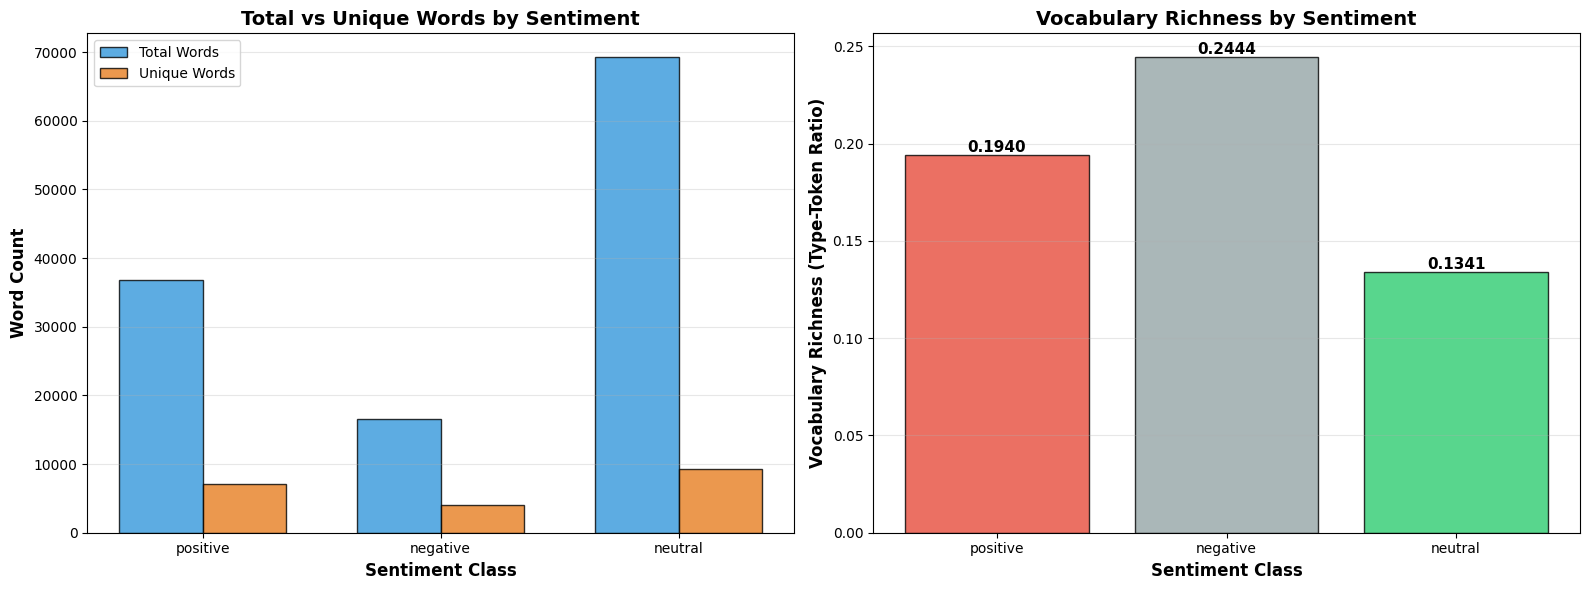


Vocabulary Statistics:

positive:
  Total words: 36,864
  Unique words: 7,151
  Vocabulary richness: 0.1940

negative:
  Total words: 16,567
  Unique words: 4,049
  Vocabulary richness: 0.2444

neutral:
  Total words: 69,279
  Unique words: 9,289
  Vocabulary richness: 0.1341


{'positive': {'total_words': 36864,
  'unique_words': 7151,
  'vocabulary_richness': 0.19398328993055555},
 'negative': {'total_words': 16567,
  'unique_words': 4049,
  'vocabulary_richness': 0.244401521096155},
 'neutral': {'total_words': 69279,
  'unique_words': 9289,
  'vocabulary_richness': 0.13408103465696675}}

In [12]:
plot_vocabulary_analysis(df)

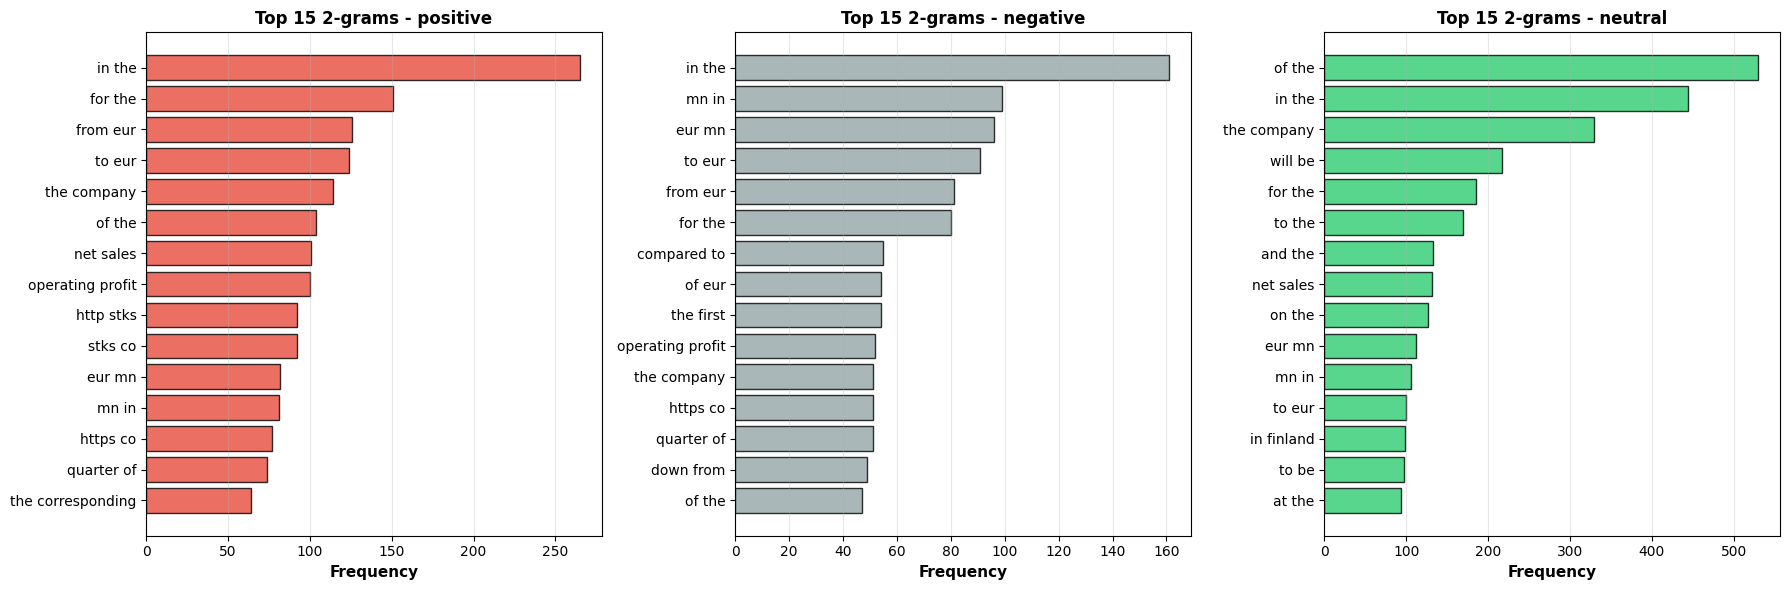

In [13]:
plot_top_ngrams(df, n=2, top_k=15) # Example for bigrams

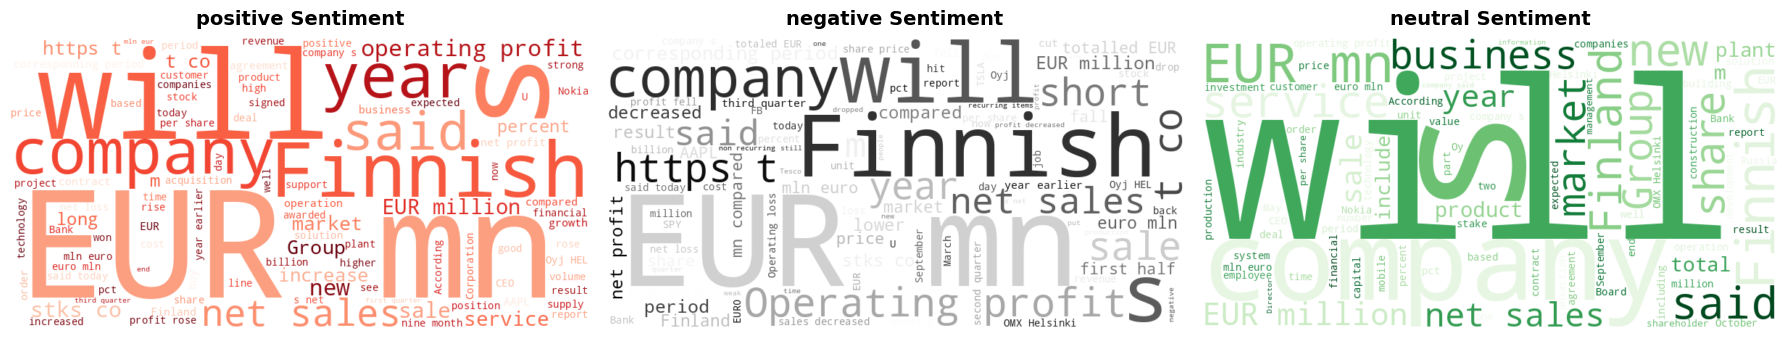

In [14]:
plot_wordclouds(df)

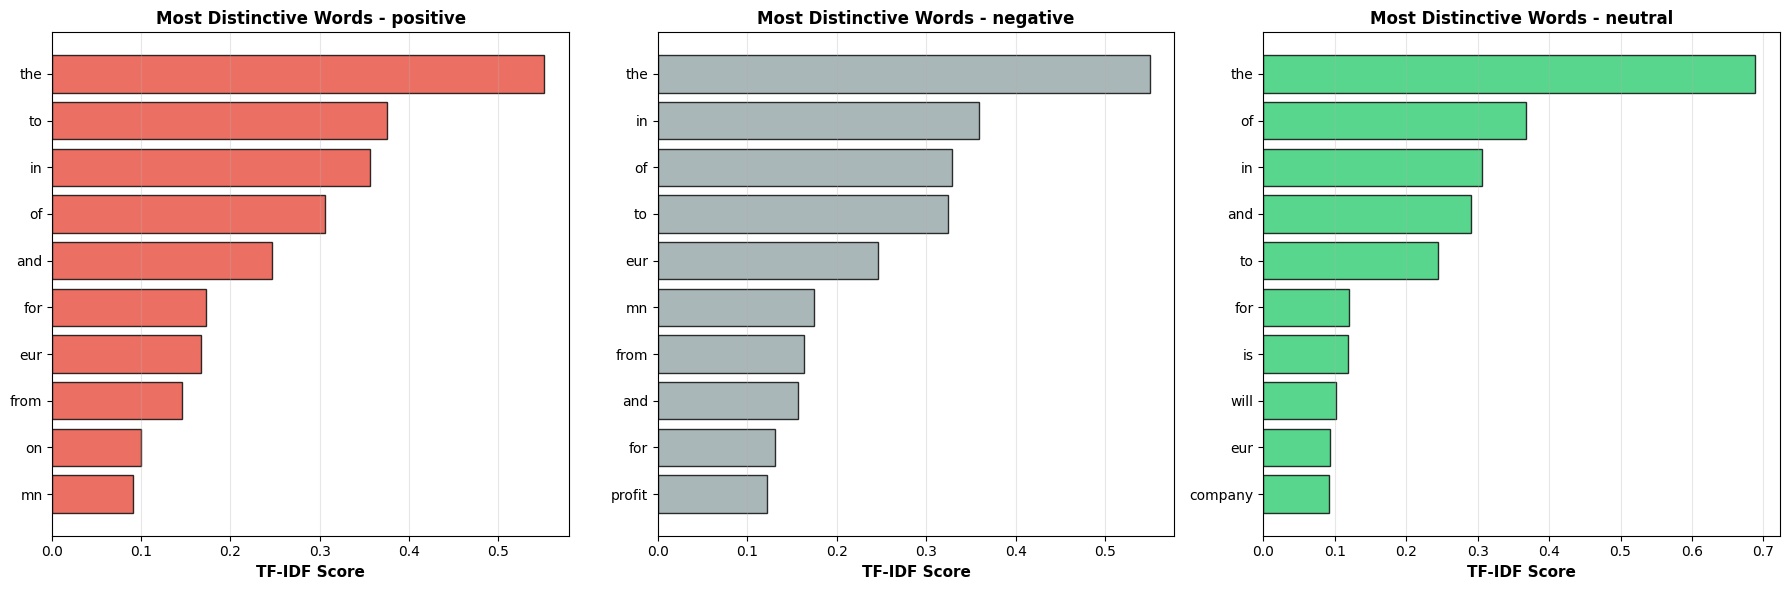

In [15]:
plot_sentiment_specific_words(df)

In [16]:
import nltk
import re

# Download necessary NLTK data
try:
    nltk.data.find('corpora/stopwords')
except LookupError:
    nltk.download('stopwords')
try:
    nltk.data.find('tokenizers/punkt')
except LookupError:
    nltk.download('punkt')
try:
    nltk.data.find('tokenizers/punkt_tab') # Add this to download punkt_tab
except LookupError:
    nltk.download('punkt_tab')

from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

stop_words = set(stopwords.words('english'))

def preprocess_text(text):
    # Convert to lowercase
    text = text.lower()
    # Remove punctuation
    text = re.sub(r'[^"\w\s’]', '', text) # Keep apostrophes common in contractions
    # Remove numbers and special characters
    text = re.sub(r'\d+', '', text) # Remove digits
    text = re.sub(r'[^a-zA-Z\s]', '', text) # Remove any remaining non-alphabetic characters except spaces
    # Remove extra spaces
    text = re.sub(r'\s+', ' ', text).strip()
    # Remove stopwords
    word_tokens = word_tokenize(text)
    filtered_sentence = [w for w in word_tokens if not w in stop_words]
    text = " ".join(filtered_sentence)
    return text

# Apply the preprocessing function
df['cleaned_sentence'] = df['Sentence'].apply(preprocess_text)

print("First 5 rows of 'Sentence' and 'cleaned_sentence':")
print(df[['Sentence', 'cleaned_sentence']].head())
print("\nInfo on the updated DataFrame with 'cleaned_sentence' column:")
df.info()

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.


First 5 rows of 'Sentence' and 'cleaned_sentence':
                                            Sentence  \
0  The GeoSolutions technology will leverage Bene...   
1  $ESI on lows, down $1.50 to $2.50 BK a real po...   
2  For the last quarter of 2010 , Componenta 's n...   
3  According to the Finnish-Russian Chamber of Co...   
4  The Swedish buyout firm has sold its remaining...   

                                    cleaned_sentence  
0  geosolutions technology leverage benefon gps s...  
1                       esi lows bk real possibility  
2  last quarter componenta net sales doubled eurm...  
3  according finnishrussian chamber commerce majo...  
4  swedish buyout firm sold remaining percent sta...  

Info on the updated DataFrame with 'cleaned_sentence' column:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5842 entries, 0 to 5841
Data columns (total 5 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Sentence        

In [17]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

# Encode the 'Sentiment' column
label_encoder = LabelEncoder()
df['sentiment_encoded'] = label_encoder.fit_transform(df['Sentiment'])

# Display the mapping
print("Sentiment Label Mapping:")
for i, sentiment in enumerate(label_encoder.classes_):
    print(f"{sentiment}: {i}")

# Split the data into training and testing sets
X = df['cleaned_sentence']
y = df['sentiment_encoded']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

print(f"\nShape of X_train: {X_train.shape}")
print(f"Shape of X_test: {X_test.shape}")
print(f"Shape of y_train: {y_train.shape}")
print(f"Shape of y_test: {y_test.shape}")

print("\nDistribution of sentiment in training set:")
print(y_train.value_counts(normalize=True))
print("\nDistribution of sentiment in test set:")
print(y_test.value_counts(normalize=True))

Sentiment Label Mapping:
negative: 0
neutral: 1
positive: 2

Shape of X_train: (4673,)
Shape of X_test: (1169,)
Shape of y_train: (4673,)
Shape of y_test: (1169,)

Distribution of sentiment in training set:
sentiment_encoded
1    0.535844
2    0.316927
0    0.147229
Name: proportion, dtype: float64

Distribution of sentiment in test set:
sentiment_encoded
1    0.535500
2    0.317365
0    0.147134
Name: proportion, dtype: float64
